Concatenating numerical and categorical

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 100

In [3]:
df = pd.read_csv ('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [53]:
def drop_columns(df):
    df.drop(columns=["Unnamed: 0"], inplace=True)
    return df

In [6]:
drop_columns(df)


,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [7]:
numerical = df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [8]:
categorical = df.select_dtypes(include=np.object)
categorical

/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_32014/2844959617.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df.select_dtypes(include=np.object)


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [55]:
def drop_columns(categorical):
    df.drop(columns=["policy"], inplace=True)
    return categorical

In [57]:
drop_columns(categorical)

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [9]:
categorical = pd.get_dummies(categorical, drop_first = True)

In [10]:
categorical


,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [11]:
# Concatenating Numerical and Categorical
df_new = pd.concat([numerical, categorical], axis=1)

In [12]:
df_new

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [14]:
X=df_new.drop('total_claim_amount', axis=1)
y=df_new.total_claim_amount

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [17]:
X_test_scaled=std_scaler.transform(X_test)

In [18]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.2632667  -0.67143823 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.42794064 -1.36853038 -0.72925469 ...  1.95232568 -1.52684497
   2.04310398]
 [-0.5223013   0.26299646  0.48489091 ... -0.51220962  0.65494534
  -0.48945135]
 ...
 [-0.81132612 -1.16342071 -0.90270406 ...  1.95232568 -1.52684497
   2.04310398]
 [ 2.25575772  0.97656622 -0.78707115 ... -0.51220962  0.65494534
  -0.48945135]
 [ 1.18923585 -0.01438919 -0.55580532 ... -0.51220962  0.65494534
  -0.48945135]]
--------
[[-0.40967729 -0.94647238 -0.61362178 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.7597249  -0.93254692 -0.64253    ... -0.51220962  0.65494534
  -0.48945135]
 [ 0.57248529 -1.22437973 -0.90270406 ...  1.95232568  0.65494534
  -0.48945135]
 ...
 [-0.79857077  0.60844433 -0.58471355 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.42547654 -0.96649777 -0.81597938 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.49881985 -0.94988352  0.71615674 ...  1.95232568 -1.52684497
  -0.48945135]]


In [19]:
#Applying Linear Regression
X.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'region_east',
       'region_north west', 'region_west region',
       ...
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_class_two-door car',
       'vehicle_size_medsize', 'vehicle_size_small'],
      dtype='object', length=108)

In [23]:
#Model interpretation
# target = b1 * median + b2* avg + b0 (para calcular o slope e o intercept)
# aqui esta treinando a machine com um exemplo, pois é um supervised learning model
#Using Scikit Learn
from sklearn.linear_model import LinearRegression
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [24]:
type(model)

sklearn.linear_model._base.LinearRegression

In [25]:
model.coef_

array([ 1.61093379e-01, -5.34741457e+00,  1.79289174e+02,  4.89682016e+00,
       -4.10904241e-02,  1.39106129e+00, -7.43152201e-01,  2.50343957e+00,
       -1.71582552e-01,  2.60010946e+00, -9.46705896e+00, -5.42226388e+00,
       -3.97670098e+00, -3.31795874e+00, -4.08390180e+00,  2.02658584e+00,
       -2.82500524e+00, -1.05051206e+00, -7.45082321e-01,  6.59168252e-01,
        2.21334971e+00, -1.18626338e+00, -2.10832567e+00, -2.65321100e+00,
       -2.56138162e+00, -3.15822855e+00, -3.13208924e+00,  1.19669867e+00,
        6.38232369e-01, -3.08884230e+00, -5.44465175e-01, -2.89794304e+00,
       -3.97840098e+00, -2.88579256e+00,  1.03052167e+00,  8.90504795e-01,
       -2.42528292e+00,  1.50623828e+00,  3.33293286e-01, -1.57152828e+00,
       -4.50424386e+00, -6.27677105e-01, -4.78169224e-01, -6.51730455e-03,
       -2.92335815e+00, -2.33572503e+00, -4.94059259e+00,  4.94299200e+14,
        5.03472744e+14,  5.14248757e+14,  4.94299200e+14,  4.47459723e+14,
        5.23045867e+14,  

In [26]:
model.intercept_

433.2770896620007

In [27]:
#y= 1.34* avg_fam_income  -0.41 * pobc2   +5.45 * avggift  -0.48 (valores do coeficiente) * med_home_val_transformed  + 15.66 (valor do intercept)
y_pred=model.predict(X_test_scaled)   # model prediction - computing the target variable

y_pred_train=model.predict(X_train_scaled)

In [28]:
residual = y_test - y_pred
residual

4665    -109.601950
4072     -38.432711
4549     118.242877
4211      41.240700
3081      86.854347
            ...    
3488      72.722463
1667      21.377654
1516    -225.974326
10215     56.620500
2931    -150.057988
Name: total_claim_amount, Length: 3207, dtype: float64

In [29]:
X_train.shape

(7482, 108)

In [33]:
#Model Validation
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [34]:
y_pred

array([454.60194955, 383.43271126, 138.75712343, ..., 575.974326  ,
       -29.62050012, 470.05798811])

In [35]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

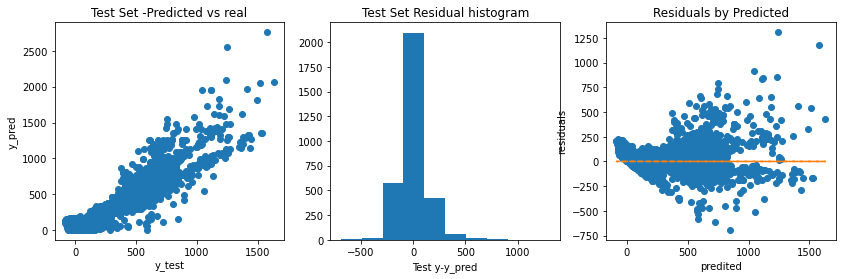

In [52]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')
plt.show();

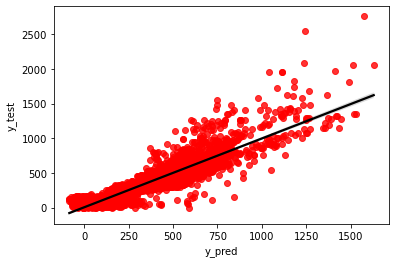

In [51]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.show();

MSE

In [38]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

19176.016090637066


RMSE

In [39]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

138.47749308330603


MAE

In [40]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

95.91816821175627


In [41]:
mean_squared_error(y_train,y_pred_train)

19692.74292752588

R2

In [42]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2

0.7701131633774758

In [43]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

Adjusted R2

In [44]:
X_test.shape[1]

108

In [45]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7620990322105189

Feature importance

In [46]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [47]:
features_importances

,Attribute,Importance
75,month_jan,1.880878e+15
91,policy_personal l3,1.446571e+15
86,policy_type_special auto,1.411588e+15
85,policy_type_personal auto,1.302311e+15
90,policy_personal l2,1.253472e+15
...,...,...
88,policy_corporate l3,1.536338e-01
83,marital_status_married,1.051763e-01
105,vehicle_class_two-door car,7.124581e-02
4,months_since_policy_inception,4.109042e-02


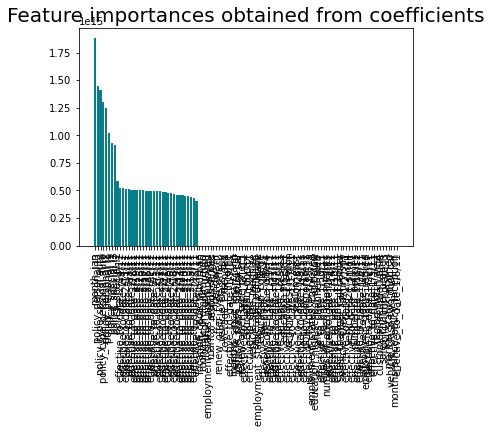

In [50]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show();

In [20]:
#Model interpretation using using Statsmodel

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     239.0
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:54:31   Log-Likelihood:                -47599.
No. Observations:                7482   AIC:                         9.541e+04
Df Residuals:                    7376   BIC:                         9.614e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.632    265.345      0.0

In [21]:
predictions_test

array([452.21340455, 394.58564351, 138.85126203, ..., 579.24489257,
       -32.40173853, 480.1344889 ])

In [22]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7696357753043289
